# Hierarchical clustering

Hierarchical clustering can be viewed as an extension to the k-means clustering procedure that we used previously to cluster 2D data and then to cluster the colors in image pixels (you used this in the Warhol lab). In hierarchical clustering, we will split the data into two clusters and then further subdivide clusters. This leads to a hierarchy of clusters that can be represented by a tree-like structure called a dendrogram.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

(25,)


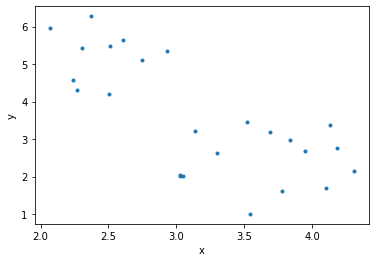

In [2]:
# Conceptually demonstrate k-means clustering in 2D
# Generate some random vectors stored in x and y:
x = np.concatenate([2.0+1.0*np.random.rand(10),3.0+2.0*np.random.rand(15)])
y = np.concatenate([4.0+2.5*np.random.rand(10),1.0+2.5*np.random.rand(15)])
print(x.shape)
plt.figure
plt.plot(x,y,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# This will combine x and y into a single matrix. Each column of the matrix will contain a single (x,y) pair.
# The first row in the matrix will contain all of the x-values
# The seecond row in the matrix will contain all of the y-values
observations = np.vstack((x,y)).transpose()
# NOTE: OpenCV will only allow observation vectors stored as float32. 
# You can convert from one datatype to another. Here we are converting observations to 'float32':
observations = np.array(observations,dtype='float32')

# Carry out the clustering

The hierarchical clustering can be carried out with a single python command (!)

The result Z is a (n-1) by 4 matrix. From the scipy documentation:

A ($n-1$) by 4 matrix Z is returned. At the -th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster $n+i$. A cluster with an index less than $n$ corresponds to one of the  original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

In [3]:
X = np.stack([x,y]).transpose()
print(X.shape)
Z = linkage(X, 'ward')
print(Z)

(25, 2)
[[1.20000000e+01 2.40000000e+01 2.45759997e-02 2.00000000e+00]
 [1.10000000e+01 2.50000000e+01 3.52907143e-02 3.00000000e+00]
 [6.00000000e+00 9.00000000e+00 2.07096824e-01 2.00000000e+00]
 [1.80000000e+01 2.00000000e+01 2.42040315e-01 2.00000000e+00]
 [2.10000000e+01 2.30000000e+01 2.47937038e-01 2.00000000e+00]
 [2.00000000e+00 5.00000000e+00 2.63649814e-01 2.00000000e+00]
 [1.00000000e+00 8.00000000e+00 3.07705094e-01 2.00000000e+00]
 [7.00000000e+00 2.70000000e+01 3.26732038e-01 3.00000000e+00]
 [1.40000000e+01 1.90000000e+01 3.34001471e-01 2.00000000e+00]
 [4.00000000e+00 3.00000000e+01 4.13249925e-01 3.00000000e+00]
 [0.00000000e+00 3.00000000e+00 4.41511677e-01 2.00000000e+00]
 [1.00000000e+01 1.70000000e+01 4.41930176e-01 2.00000000e+00]
 [2.20000000e+01 2.80000000e+01 5.40717974e-01 3.00000000e+00]
 [1.30000000e+01 3.30000000e+01 7.10939278e-01 3.00000000e+00]
 [3.10000000e+01 3.20000000e+01 7.21956648e-01 5.00000000e+00]
 [2.90000000e+01 3.70000000e+01 7.67251527e-01 

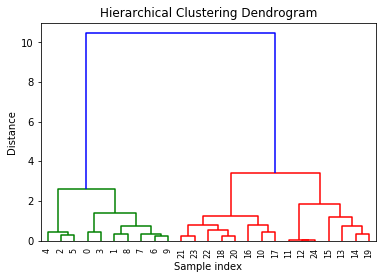

In [4]:
# calculate full dendrogram
plt.figure()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
# Note - dendrogram is a 
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()